<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://pythonquants.com' target='_blank'>www.pythonquants.com</a>

**Contact us** | <a href='mailto:analytics@pythonquants.com'>analytics@pythonquants.com</a>

# Web Integration

## Web Basics

### ftplib

In [1]:
import ftplib
import numpy as np

In [2]:
ftp = ftplib.FTP('quant-platform.com')

In [3]:
ftp.login(user='python', passwd='python')

'230 Login successful.'

In [4]:
np.save('./data/array', np.random.standard_normal((100, 100)))

In [5]:
f = open('./data/array.npy', 'r')

In [6]:
ftp.storbinary('STOR array.npy', f)

'226 Transfer complete.'

In [7]:
ftp.retrlines('LIST')

-rw-------    1 1001     1001        80080 Aug 08 05:57 array.npy


'226 Directory send OK.'

In [8]:
f = open('./data/array_ftp.npy', 'wb').write

In [9]:
ftp.retrbinary('RETR array.npy', f)

'226 Transfer complete.'

In [10]:
ftp.delete('array.npy')

'250 Delete operation successful.'

In [11]:
ftp.retrlines('LIST')

'226 Directory send OK.'

In [12]:
ftp.close()

In [13]:
!ls -n ./data

total 164
-rw-r--r-- 1 1141 8 77824 Aug  8 12:07 array_ftp.npy
-rw-r--r-- 1 1141 8 80080 Aug  8 12:07 array.npy


In [14]:
!rm -f ./data/arr*
  # clean-up directory

In [15]:
ftps = ftplib.FTP_TLS('quant-platform.com')

In [16]:
ftps.login(user='python', passwd='python')

'230 Login successful.'

In [17]:
ftps.prot_p()

'200 PROT now Private.'

In [18]:
ftps.retrlines('LIST')

'226 Directory send OK.'

In [19]:
ftps.close()

### httplib

In [20]:
import httplib

In [21]:
http = httplib.HTTPConnection('hilpisch.com')

In [22]:
http.request('GET', '/index.htm')

In [23]:
resp = http.getresponse()

In [24]:
resp.status, resp.reason

(200, 'OK')

In [25]:
content = resp.read()
content[:100]
  # first 100 characters of the file

'<!doctype html>\n<html lang="en">\n\n\t<head>\n\t\t<meta charset="utf-8">\n\n\t\t<title>Dr. Yves J. Hilpisch \xe2\x80'

In [26]:
index = content.find(' E ')
index

2070

In [27]:
content[index:index + 29]

' E contact [at] dyjh [dot] de'

In [28]:
http.close()

### urllib

In [29]:
import urllib

In [30]:
url = 'http://ichart.finance.yahoo.com/table.csv?g=d&ignore=.csv'
url += '&s=YHOO&a=01&b=1&c=2014&d=02&e=6&f=2014'

In [31]:
connect = urllib.urlopen(url)

In [32]:
data = connect.read()

In [33]:
print data

Date,Open,High,Low,Close,Volume,Adj Close
2014-03-06,39.599998,39.98,39.50,39.66,10626700,39.66
2014-03-05,39.830002,40.150002,39.189999,39.50,12536800,39.50
2014-03-04,38.759998,39.790001,38.68,39.630001,16139400,39.630001
2014-03-03,37.650002,38.66,37.43,38.25,14714700,38.25
2014-02-28,38.549999,39.380001,38.220001,38.669998,16957100,38.669998
2014-02-27,37.799999,38.48,37.740002,38.470001,15489400,38.470001
2014-02-26,37.349998,38.099998,37.34,37.619999,15778900,37.619999
2014-02-25,37.48,37.580002,37.02,37.259998,9756900,37.259998
2014-02-24,37.23,37.709999,36.82,37.419998,15738900,37.419998
2014-02-21,37.900002,37.959999,37.220001,37.290001,12351900,37.290001
2014-02-20,37.830002,38.040001,37.299999,37.790001,11155900,37.790001
2014-02-19,38.060001,38.330002,37.68,37.810001,15851900,37.810001
2014-02-18,38.310001,38.59,38.09,38.310001,12096400,38.310001
2014-02-14,38.43,38.450001,38.110001,38.23,9975800,38.23
2014-02-13,37.919998,38.689999,37.790001,38.52,12088100,38.52
2014-02-12

In [34]:
url = 'http://ichart.finance.yahoo.com/table.csv?g=d&ignore=.csv'
url += '&%s'  # for replacement with parameters
url += '&d=06&e=30&f=2014'

In [35]:
params = urllib.urlencode({'s': 'MSFT', 'a': '05', 'b': 1, 'c': 2014})

In [36]:
params

'a=05&s=MSFT&b=1&c=2014'

In [37]:
url % params

'http://ichart.finance.yahoo.com/table.csv?g=d&ignore=.csv&a=05&s=MSFT&b=1&c=2014&d=06&e=30&f=2014'

In [38]:
connect = urllib.urlopen(url % params)

In [39]:
data = connect.read()

In [40]:
print data

Date,Open,High,Low,Close,Volume,Adj Close
2014-07-30,44.07,44.099998,43.290001,43.580002,31921400,42.457994
2014-07-29,43.91,44.09,43.639999,43.889999,27763100,42.760011
2014-07-28,44.360001,44.509998,43.93,43.970001,29684200,42.837953
2014-07-25,44.299999,44.66,44.299999,44.50,26737700,43.354306
2014-07-24,44.93,45.00,44.32,44.400002,30725300,43.256882
2014-07-23,45.450001,45.450001,44.619999,44.869999,52362900,43.714779
2014-07-22,45.00,45.150002,44.59,44.830002,43095800,43.675812
2014-07-21,44.560001,45.16,44.220001,44.84,37604400,43.685553
2014-07-18,44.650002,44.84,44.25,44.689999,43407500,43.539413
2014-07-17,45.450001,45.709999,44.25,44.529999,82180300,43.383533
2014-07-16,42.509998,44.310001,42.48,44.080002,63318000,42.945121
2014-07-15,42.330002,42.470001,42.029999,42.450001,28748700,41.357086
2014-07-14,42.220001,42.450001,42.040001,42.139999,21881100,41.055066
2014-07-11,41.700001,42.09,41.48,42.09,24083000,41.006354
2014-07-10,41.369999,42.00,41.049999,41.689999,21854700,40

In [41]:
urllib.urlretrieve(url % params, './data/msft.csv')

('./data/msft.csv', <httplib.HTTPMessage instance at 0x7f6568555ab8>)

In [42]:
csv = open('./data/msft.csv', 'r')
csv.readlines()[:5]

['Date,Open,High,Low,Close,Volume,Adj Close\n',
 '2014-07-30,44.07,44.099998,43.290001,43.580002,31921400,42.457994\n',
 '2014-07-29,43.91,44.09,43.639999,43.889999,27763100,42.760011\n',
 '2014-07-28,44.360001,44.509998,43.93,43.970001,29684200,42.837953\n',
 '2014-07-25,44.299999,44.66,44.299999,44.50,26737700,43.354306\n']

In [43]:
!rm -f ./data/*

## Web Plotting

### Static Plots

In [44]:
import numpy as np
import pandas as pd
%matplotlib inline

In [45]:
url = 'http://ichart.yahoo.com/table.csv?s=MSFT&a=0&b=1&c=2009'
data = pd.read_csv(url, parse_dates=['Date'])

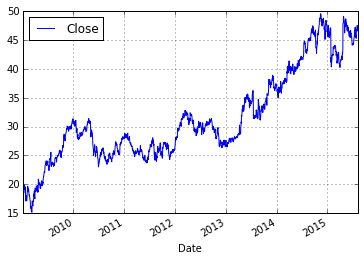

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data.plot(x='Date', y='Close', grid=True, ax=ax)
# tag: microsoft
# title: Historical stock prices for Microsoft since January 2009 (+matplotlib+)

### Interactive Plots

**REMARK**: The original version used Bokeh for Web plotting. Plotly seems to be the more easy and intuitive way for generating interactive D3.js Web plots.

In [47]:
import plotly.plotly as py
import cufflinks as cf
py.sign_in('Python-Demo-Account', 'gwt101uhh0')

In [48]:
# transforming the above mpl figure
# to interactive D3.js plot
py.iplot_mpl(fig)

/anaconda/lib/python2.7/site-packages/plotly/matplotlylib/renderer.py:382: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/anaconda/lib/python2.7/site-packages/plotly/matplotlylib/renderer.py:479: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [49]:
# direct approach with Cufflinks
data.set_index('Date')['Close'].iplot(world_readable=True)

### Real-Time Plots

#### Real-Time FX Data

In [50]:
import time
import pandas as pd
import datetime as dt
import requests

In [51]:
url = 'http://api-sandbox.oanda.com/v1/prices?instruments=%s'
  # real-time FX (dummy!) data from JSON API

In [52]:
instrument = 'EUR_USD'
api = requests.get(url % instrument)

In [53]:
data = api.json()
data

{u'prices': [{u'ask': 1.24073,
   u'bid': 1.24059,
   u'instrument': u'EUR_USD',
   u'time': u'2015-08-08T09:57:19.523848Z'}]}

In [54]:
data = data['prices'][0]
data

{u'ask': 1.24073,
 u'bid': 1.24059,
 u'instrument': u'EUR_USD',
 u'time': u'2015-08-08T09:57:19.523848Z'}

In [55]:
ticks = pd.DataFrame({'bid': data['bid'],
                      'ask': data['ask'],
                      'instrument': data['instrument'],
                      'time': pd.Timestamp(data['time'])},
                      index=[pd.Timestamp(data['time']),])
  # initialization of ticks DataFrame

In [56]:
ticks[['ask', 'bid', 'instrument']]

,ask,bid,instrument
2015-08-08 09:57:19.523848+00:00,1.24073,1.24059,EUR_USD


#### Real-Time Stock Price Quotes

In [57]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=%s.N&csv_format=csv'
url = url1 + url2

In [58]:
# must be a business day
today = dt.datetime.now()
y = '%d' % today.year
  # current year
m = '%02d' % today.month
  # current month, add leading zero if needed
d = '%02d' % today.day
  # current day, add leading zero if needed
sym = 'NKE'
  # Nike Inc. stocks

In [59]:
y, m, d, sym

('2015', '08', '08', 'NKE')

In [60]:
urlreq = url % (y, m, d, sym)
urlreq

'http://www.netfonds.no/quotes/posdump.php?date=20150808&paper=NKE.N&csv_format=csv'

In [61]:
data = pd.read_csv(urlreq, parse_dates=['time'])
  # initialize DataFrame object

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
time                 0 non-null object
bid                  0 non-null object
bid_depth            0 non-null object
bid_depth_total      0 non-null object
offer                0 non-null object
offer_depth          0 non-null object
offer_depth_total    0 non-null object
dtypes: object(7)
memory usage: 0.0+ bytes


## Rapid Web Applications

### Traders' Chat Room

### Data Modeling

### The Python Code

#### Imports and Database Preliminaries

#### Core Functionality

### Templating

In [63]:
'%d, %d, %d' % (1, 2, 3)

'1, 2, 3'

In [64]:
'{}, {}, {}'.format(1, 2, 3)

'1, 2, 3'

In [65]:
'{}, {}, {}'.format(*'123')

'1, 2, 3'

In [66]:
templ = '''<!doctype html>
  Just print out <b>numbers</b> provided to the template.
  <br><br>
  {% for number in numbers %}
    {{ number }}
  {% endfor %}
'''

In [67]:
from jinja2 import Template

In [68]:
t = Template(templ)

In [69]:
html = t.render(numbers=range(5))

In [70]:
html

u'<!doctype html>\n  Just print out <b>numbers</b> provided to the template.\n  <br><br>\n  \n    0\n  \n    1\n  \n    2\n  \n    3\n  \n    4\n  '

In [71]:
from IPython.display import HTML
HTML(html)

### Styling

In [72]:
import os
for path, dirs, files in os.walk('../python/tradechat'):
  print path
  for f in files:
    print f

../python/tradechat
tradechat.db
tables.sql
tradechat.py
../python/tradechat/templates
show_entries.html
layout.html
register.html
login.html
../python/tradechat/static
style.css


## Web Services

### The Financial Model

### The Implementation

In [73]:
import sys
sys.path.append("../python/volservice")
  # adjust if necessary to your path

In [74]:
from werkzeug.wrappers import Request, Response 

In [75]:
from vol_pricing_service import get_option_value

In [76]:
def application(environ, start_response):
    request = Request(environ)
      # wrap environ in new object
    text = get_option_value(request.args)
      # provide all paramters of the call to function
      # get back either error message or option value
    response = Response(text, mimetype='text/html')
      # generate response object based on the returned text
    return response(environ, start_response)

In [77]:
import numpy as np
import urllib
url = 'http://localhost:4000/'

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>